# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Load the housing dataset

In [2]:
df = pd.read_csv('Housing.csv')
df.dropna(inplace=True)  # Remove missing values

# Selecting one feature for simple linear regression (e.g., Square Footage)

In [3]:
X = df['area'].values.reshape(-1, 1)  # Reshape for scaling
y = df['price'].values  # Target (Dependent Variable)

# Standardize X values

In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(X).flatten()

# Calculate the mean of X and y

In [5]:
xmean = np.mean(X)
ymean = np.mean(y)

# Calculate the terms needed for the numerator and denominator of beta

In [6]:
df['xycov'] = (X - xmean) * (y - ymean)
df['xvar'] = (X - xmean) ** 2

# Calculate beta and alpha

In [7]:
beta = df['xycov'].sum() / df['xvar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')

alpha = 4766729.247706422
beta = 1001630.4758732349


# Predict house prices

In [8]:
y_pred = alpha + beta * X

# Plot regression against actual data

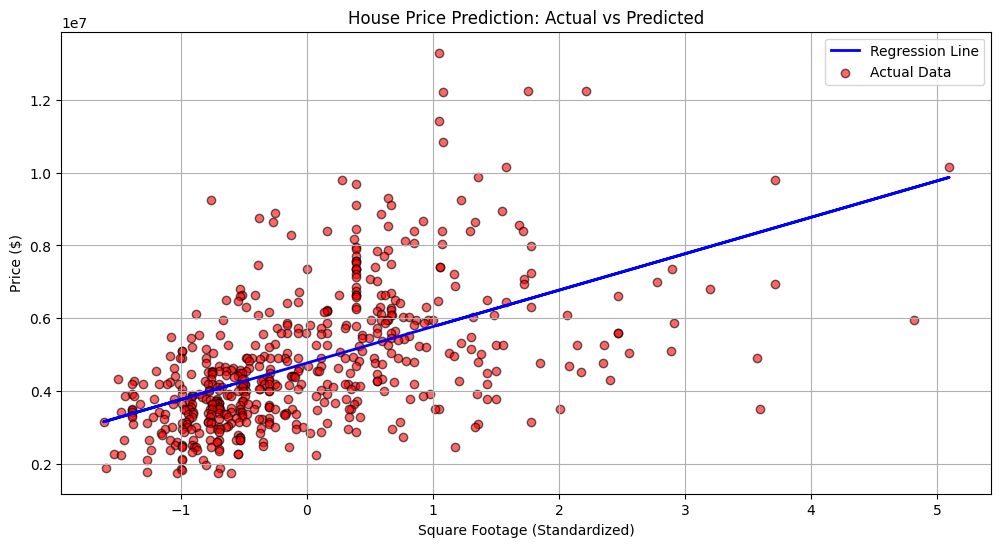

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(X, y_pred, color='blue', linewidth=2, label='Regression Line')  
plt.scatter(X, y, color='red', alpha=0.6, edgecolors='k', label='Actual Data')  
plt.title('House Price Prediction: Actual vs Predicted')
plt.xlabel('Square Footage (Standardized)')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# Function to predict new house prices

In [10]:
def predict_price(sq_ft_value):
    standardized_value = scaler.transform([[sq_ft_value]])[0, 0]
    return alpha + beta * standardized_value

# Example: Predict price for a 2000 sq ft house
predicted_price = predict_price(2000)
print(f'Predicted Price for 2000 sq ft house: ${predicted_price:.2f}')

Predicted Price for 2000 sq ft house: $3311258.27
